In [ ]:
# Use mock data if real EU data is not available
if eu_stats_df is not None and not eu_stats_df.empty:
    boxplot_df = eu_stats_df
    data_mode = "REAL DATA"
else:
    boxplot_df = mock_eu_stats_df
    data_mode = "EXAMPLE (Mock Data)"

if boxplot_df is not None and not boxplot_df.empty:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'EU Metrics Box Plot Analysis - {data_mode}', fontsize=16, fontweight='bold', y=0.995)
    
    # Box plot 1: EU Vector Lengths Distribution (Min, Mean, Max)
    ax1 = axes[0, 0]
    bp1_data = [boxplot_df['min_length'], boxplot_df['mean_length'], boxplot_df['max_length']]
    bp1 = ax1.boxplot(bp1_data, labels=['Min Length', 'Mean Length', 'Max Length'],
                      patch_artist=True, showmeans=True,
                      meanprops=dict(marker='D', markerfacecolor='red', markersize=8),
                      medianprops=dict(color='darkblue', linewidth=2),
                      boxprops=dict(facecolor='lightblue', edgecolor='darkblue', linewidth=1.5),
                      whiskerprops=dict(color='darkblue', linewidth=1.5),
                      capprops=dict(color='darkblue', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))
    ax1.set_ylabel('EU Vector Length', fontsize=11, fontweight='bold')
    ax1.set_title('EU Vector Length Distribution', fontsize=12, fontweight='bold', pad=10)
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    ax1.legend([bp1['medians'][0], bp1['means'][0]], ['Median', 'Mean'], loc='upper right')
    
    # Add statistical annotations
    for i, data in enumerate(bp1_data, 1):
        median = data.median()
        mean = data.mean()
        ax1.text(i, median, f'{median:.1f}', ha='left', va='center', fontsize=9, color='darkblue')
        ax1.text(i, mean, f'{mean:.1f}', ha='right', va='center', fontsize=9, color='red')
    
    # Box plot 2: Standard Deviation of EU Lengths
    ax2 = axes[0, 1]
    bp2 = ax2.boxplot([boxplot_df['std_length']], labels=['Std Dev'],
                      patch_artist=True, showmeans=True, widths=0.5,
                      meanprops=dict(marker='D', markerfacecolor='red', markersize=8),
                      medianprops=dict(color='darkgreen', linewidth=2),
                      boxprops=dict(facecolor='lightgreen', edgecolor='darkgreen', linewidth=1.5),
                      whiskerprops=dict(color='darkgreen', linewidth=1.5),
                      capprops=dict(color='darkgreen', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))
    ax2.set_ylabel('Standard Deviation', fontsize=11, fontweight='bold')
    ax2.set_title('EU Length Variability (Std Dev)', fontsize=12, fontweight='bold', pad=10)
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add statistics
    std_median = boxplot_df['std_length'].median()
    std_mean = boxplot_df['std_length'].mean()
    std_q1 = boxplot_df['std_length'].quantile(0.25)
    std_q3 = boxplot_df['std_length'].quantile(0.75)
    ax2.text(1.15, std_median, f'Median: {std_median:.2f}', fontsize=10, color='darkgreen', fontweight='bold')
    ax2.text(1.15, std_mean, f'Mean: {std_mean:.2f}', fontsize=10, color='red', fontweight='bold')
    ax2.text(1.15, std_q1, f'Q1: {std_q1:.2f}', fontsize=9, color='gray')
    ax2.text(1.15, std_q3, f'Q3: {std_q3:.2f}', fontsize=9, color='gray')
    
    # Box plot 3: Average EU per Feature
    ax3 = axes[1, 0]
    bp3 = ax3.boxplot([boxplot_df['avg_eu_per_feature']], labels=['Avg EU/Feature'],
                      patch_artist=True, showmeans=True, widths=0.5,
                      meanprops=dict(marker='D', markerfacecolor='red', markersize=8),
                      medianprops=dict(color='purple', linewidth=2),
                      boxprops=dict(facecolor='lavender', edgecolor='purple', linewidth=1.5),
                      whiskerprops=dict(color='purple', linewidth=1.5),
                      capprops=dict(color='purple', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))
    ax3.set_ylabel('Avg EU per Feature', fontsize=11, fontweight='bold')
    ax3.set_title('EU Efficiency Metric Distribution', fontsize=12, fontweight='bold', pad=10)
    ax3.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add statistics
    avg_median = boxplot_df['avg_eu_per_feature'].median()
    avg_mean = boxplot_df['avg_eu_per_feature'].mean()
    avg_q1 = boxplot_df['avg_eu_per_feature'].quantile(0.25)
    avg_q3 = boxplot_df['avg_eu_per_feature'].quantile(0.75)
    avg_iqr = avg_q3 - avg_q1
    ax3.text(1.15, avg_median, f'Median: {avg_median:.2f}', fontsize=10, color='purple', fontweight='bold')
    ax3.text(1.15, avg_mean, f'Mean: {avg_mean:.2f}', fontsize=10, color='red', fontweight='bold')
    ax3.text(1.15, avg_q1, f'Q1: {avg_q1:.2f}', fontsize=9, color='gray')
    ax3.text(1.15, avg_q3, f'Q3: {avg_q3:.2f}', fontsize=9, color='gray')
    ax3.text(1.15, avg_median - avg_iqr, f'IQR: {avg_iqr:.2f}', fontsize=9, color='darkgray', style='italic')
    
    # Box plot 4: Total EU Length
    ax4 = axes[1, 1]
    bp4 = ax4.boxplot([boxplot_df['total_eu_length']], labels=['Total EU Length'],
                      patch_artist=True, showmeans=True, widths=0.5,
                      meanprops=dict(marker='D', markerfacecolor='red', markersize=8),
                      medianprops=dict(color='darkorange', linewidth=2),
                      boxprops=dict(facecolor='peachpuff', edgecolor='darkorange', linewidth=1.5),
                      whiskerprops=dict(color='darkorange', linewidth=1.5),
                      capprops=dict(color='darkorange', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5))
    ax4.set_ylabel('Total EU Length', fontsize=11, fontweight='bold')
    ax4.set_title('Total Endpoints Universe Size', fontsize=12, fontweight='bold', pad=10)
    ax4.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add statistics
    total_median = boxplot_df['total_eu_length'].median()
    total_mean = boxplot_df['total_eu_length'].mean()
    total_q1 = boxplot_df['total_eu_length'].quantile(0.25)
    total_q3 = boxplot_df['total_eu_length'].quantile(0.75)
    total_iqr = total_q3 - total_q1
    outliers = boxplot_df[(boxplot_df['total_eu_length'] < total_q1 - 1.5*total_iqr) | 
                         (boxplot_df['total_eu_length'] > total_q3 + 1.5*total_iqr)]
    
    ax4.text(1.15, total_median, f'Median: {total_median:,.0f}', fontsize=10, color='darkorange', fontweight='bold')
    ax4.text(1.15, total_mean, f'Mean: {total_mean:,.0f}', fontsize=10, color='red', fontweight='bold')
    ax4.text(1.15, total_q1, f'Q1: {total_q1:,.0f}', fontsize=9, color='gray')
    ax4.text(1.15, total_q3, f'Q3: {total_q3:,.0f}', fontsize=9, color='gray')
    ax4.text(1.15, total_median - total_iqr, f'Outliers: {len(outliers)}', fontsize=9, color='red', style='italic')
    
    plt.tight_layout()
    plt.show()
    
    # Print box plot insights
    print("\n" + "="*80)
    print("BOX PLOT ANALYSIS INSIGHTS")
    print("="*80)
    
    print("\n1. EU VECTOR LENGTH DISTRIBUTION:")
    print(f"   - Min Length: Median={boxplot_df['min_length'].median():.2f}, IQR={boxplot_df['min_length'].quantile(0.75)-boxplot_df['min_length'].quantile(0.25):.2f}")
    print(f"   - Mean Length: Median={boxplot_df['mean_length'].median():.2f}, IQR={boxplot_df['mean_length'].quantile(0.75)-boxplot_df['mean_length'].quantile(0.25):.2f}")
    print(f"   - Max Length: Median={boxplot_df['max_length'].median():.2f}, IQR={boxplot_df['max_length'].quantile(0.75)-boxplot_df['max_length'].quantile(0.25):.2f}")
    
    print("\n2. EU LENGTH VARIABILITY (STD DEV):")
    print(f"   - Median Std Dev: {std_median:.2f}")
    print(f"   - Mean Std Dev: {std_mean:.2f}")
    print(f"   - IQR: {std_q3-std_q1:.2f}")
    std_outliers = boxplot_df[(boxplot_df['std_length'] < std_q1 - 1.5*(std_q3-std_q1)) | 
                              (boxplot_df['std_length'] > std_q3 + 1.5*(std_q3-std_q1))]
    print(f"   - Outliers: {len(std_outliers)} datasets with unusual variability")
    
    print("\n3. EU EFFICIENCY (AVG EU/FEATURE):")
    print(f"   - Median: {avg_median:.2f} endpoints per feature")
    print(f"   - Mean: {avg_mean:.2f} endpoints per feature")
    print(f"   - IQR: {avg_iqr:.2f}")
    avg_outliers = boxplot_df[(boxplot_df['avg_eu_per_feature'] < avg_q1 - 1.5*avg_iqr) | 
                              (boxplot_df['avg_eu_per_feature'] > avg_q3 + 1.5*avg_iqr)]
    print(f"   - Outliers: {len(avg_outliers)} datasets with unusual efficiency")
    if len(avg_outliers) > 0:
        print(f"   - Outlier datasets: {', '.join(avg_outliers['dataset'].tolist())}")
    
    print("\n4. TOTAL EU LENGTH:")
    print(f"   - Median: {total_median:,.0f}")
    print(f"   - Mean: {total_mean:,.0f}")
    print(f"   - IQR: {total_iqr:,.0f}")
    print(f"   - Outliers: {len(outliers)} datasets with extreme EU sizes")
    if len(outliers) > 0:
        print(f"   - Outlier datasets: {', '.join(outliers['dataset'].tolist())}")
    
    print("\n" + "="*80)
else:
    print("No EU data available for box plot visualizations")

# Dataset Complexity Analysis

This notebook explores the Random Forest complexity metrics contained in ``forest_report.json``. It replicates the logic used by ``sort_datasets_by_complexity.py`` and enriches it with tabular views and visualisations to better understand how each dataset compares.

## Load the dataset report

The JSON report is generated by ``dataset_forest_report.py``. Each entry contains metadata about the dataset alongside summary statistics for the optimised Random Forest model.

In [77]:
from __future__ import annotations

from pathlib import Path
from typing import Any, Mapping
import json

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
REPORT_PATH = Path('forest_report.json')
REPORT_PATH.resolve()

PosixPath('/Users/danielamadori/Projects/drifts/random_path_worker/icde/forest_report.json')

In [78]:
with REPORT_PATH.open('r', encoding='utf-8') as handle:
    report_data: list[dict[str, Any]] = json.load(handle)

len(report_data)

87

## Build a summary table

We reuse the Random Forest estimator counts reported in ``forest_report.json`` to build a sortable summary. This mirrors the CLI behaviour after switching to raw estimator counts.

In [79]:
def to_int(value: Any | None) -> int | None:
    try:
        return int(value)
    except (TypeError, ValueError):
        return None


def to_float(value: Any | None) -> float | None:
    try:
        return float(value)
    except (TypeError, ValueError):
        return None


def extract_metadata(entry: Mapping[str, Any]) -> dict[str, Any]:
    metadata = entry.get('metadata')
    if not isinstance(metadata, Mapping):
        metadata = {}

    statistics = entry.get('forest_statistics')
    if not isinstance(statistics, Mapping):
        statistics = {}

    dataset = str(entry.get('dataset', '')) or '<unknown>'

    return {
        'dataset': dataset,
        'n_estimators': to_int(statistics.get('n_estimators')),
        'series_length': to_int(metadata.get('series_length')),
        'train_size': to_int(metadata.get('train_size')),
        'test_size': to_int(metadata.get('test_size')),
        'avg_depth': to_float(statistics.get('avg_depth')),
        'avg_leaves': to_float(statistics.get('avg_leaves')),
        'avg_nodes': to_float(statistics.get('avg_nodes')),
    }


summary_rows = [extract_metadata(entry) for entry in report_data]
summary_df = pd.DataFrame(summary_rows)
summary_df = summary_df.sort_values(
    ['n_estimators', 'series_length', 'dataset'],
    ascending=[True, True, True],
    na_position='last',
).reset_index(drop=True)
summary_df.head()


,dataset,n_estimators,series_length,train_size,test_size,avg_depth,avg_leaves,avg_nodes
0,MelbournePedestrian,10.0,24,1138,2319,9.3,40.2,79.4
1,MiddlePhalanxOutlineCorrect,10.0,80,600,291,8.0,35.6,70.2
2,ElectricDevices,10.0,96,8926,7711,26.6,360.9,720.8
3,Wafer,10.0,152,1000,6164,6.8,13.2,25.4
4,ChlorineConcentration,10.0,166,467,3840,15.1,39.4,77.8


## Full dataset ranking

The full table mirrors the CLI output but includes additional metadata for reference.

In [80]:
styled_summary = summary_df.style.format({
    'n_estimators': '{:,}'.format,
    'avg_depth': '{:.2f}'.format,
    'avg_leaves': '{:,.2f}'.format,
    'avg_nodes': '{:,.2f}'.format,
})
styled_summary

,dataset,n_estimators,series_length,train_size,test_size,avg_depth,avg_leaves,avg_nodes
0,MelbournePedestrian,10.0,24,1138,2319,9.30,40.20,79.40
1,MiddlePhalanxOutlineCorrect,10.0,80,600,291,8.00,35.60,70.20
2,ElectricDevices,10.0,96,8926,7711,26.60,360.90,720.80
3,Wafer,10.0,152,1000,6164,6.80,13.20,25.40
4,ChlorineConcentration,10.0,166,467,3840,15.10,39.40,77.80
5,Wine,10.0,234,57,54,2.60,4.40,7.80
6,FordA,10.0,500,3601,1320,10.30,30.00,59.00
7,FordB,10.0,500,3636,810,12.20,30.00,59.00
8,ScreenType,10.0,720,375,375,0.20,1.20,1.40
9,SonyAIBORobotSurface1,17.0,70,20,601,1.65,2.71,4.41


## Smallest datasets by estimator count

A horizontal bar chart provides a compact overview of the datasets with the smallest ensembles.

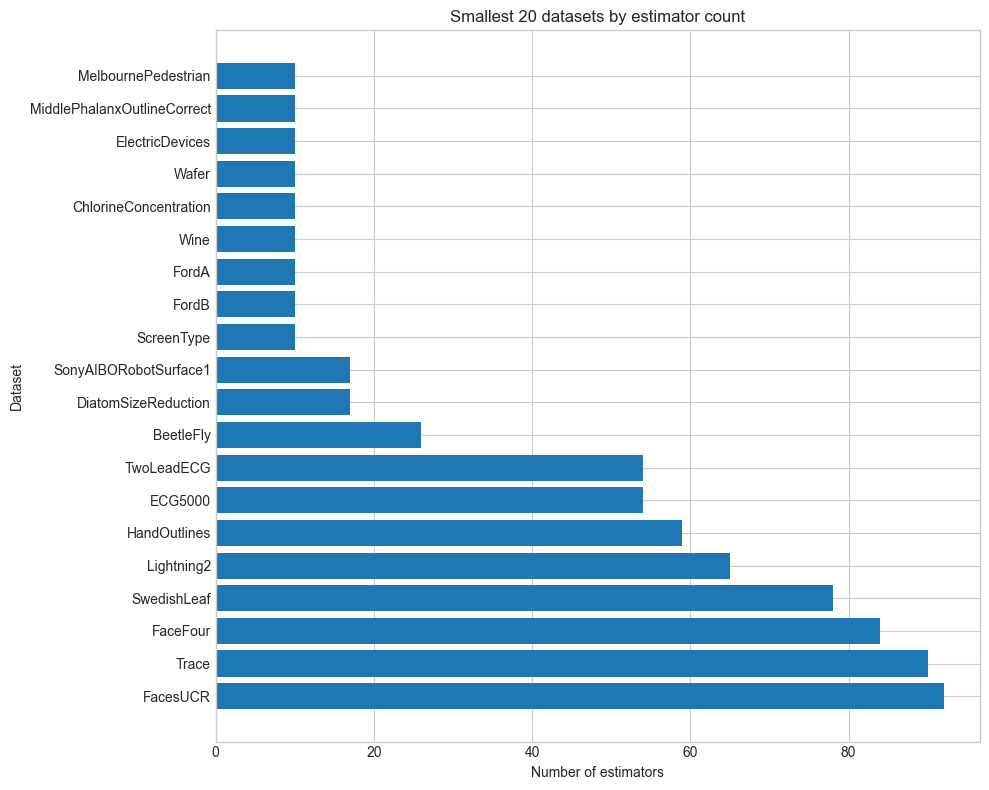

In [81]:
smallest_n = 20
least_complex = summary_df.head(smallest_n)
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(least_complex['dataset'], least_complex['n_estimators'], color='#1f77b4')
ax.set_xlabel('Number of estimators')
ax.set_ylabel('Dataset')
ax.set_title(f'Smallest {smallest_n} datasets by estimator count')
ax.invert_yaxis()
plt.tight_layout()
plt.show()


## Estimator count vs. series length

The scatter plot below highlights whether longer time series also require larger ensembles.

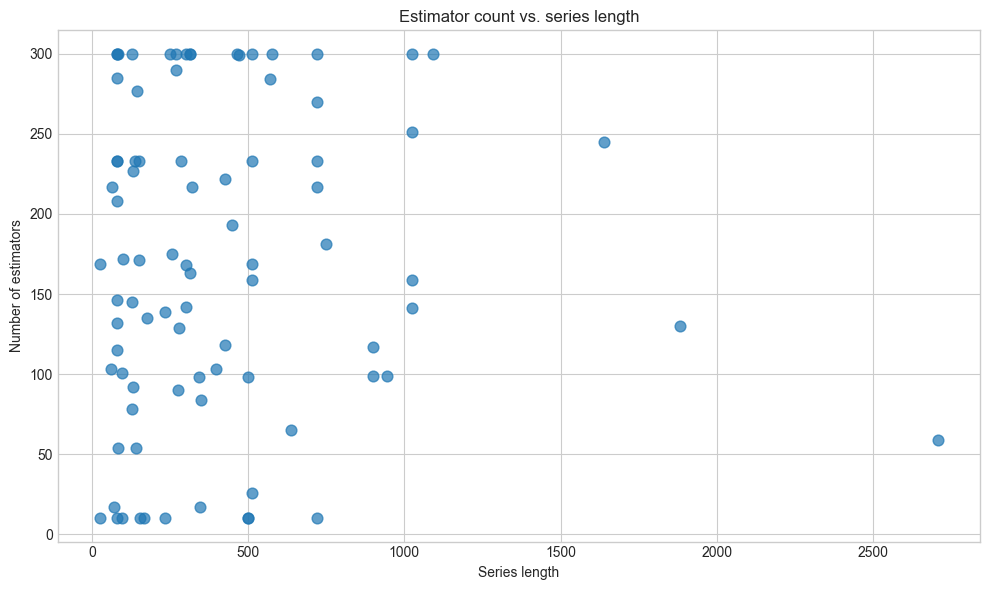

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(summary_df['series_length'], summary_df['n_estimators'], s=60, alpha=0.7)
ax.set_xlabel('Series length')
ax.set_ylabel('Number of estimators')
ax.set_title('Estimator count vs. series length')
plt.tight_layout()
plt.show()

## Distribution of estimator counts

Finally, a histogram shows how estimator usage varies across datasets.

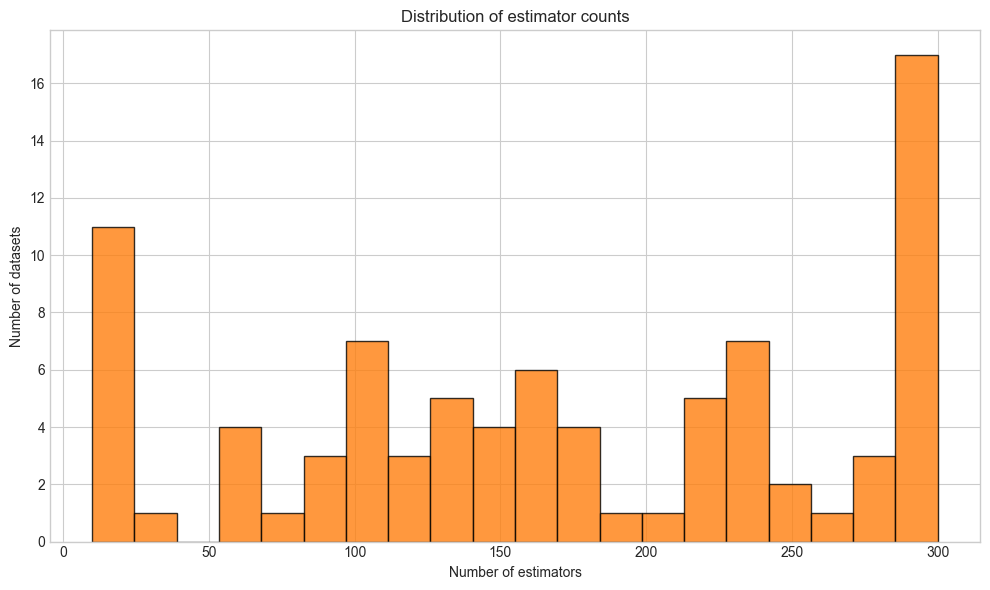

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(summary_df['n_estimators'], bins=20, color='#ff7f0e', edgecolor='black', alpha=0.8)
ax.set_xlabel('Number of estimators')
ax.set_ylabel('Number of datasets')
ax.set_title('Distribution of estimator counts')
plt.tight_layout()
plt.show()

## Endpoints Universe (EU) Analysis

Detailed analysis of EU statistics: vector lengths for each feature and calculation of average EU normalized by number of features.

In [84]:
import numpy as np

# Extract EU statistics from each report entry
eu_stats_rows = []

for entry in report_data:
    dataset = entry.get('dataset', '<unknown>')
    
    # Search for EU in various possible locations
    eu_data = None
    
    # Look for 'eu_data' or 'endpoints_universe'
    if 'eu_data' in entry:
        eu_data = entry['eu_data']
    elif 'endpoints_universe' in entry:
        eu_data = entry['endpoints_universe']
    elif 'metadata' in entry and isinstance(entry['metadata'], dict):
        if 'eu_data' in entry['metadata']:
            eu_data = entry['metadata']['eu_data']
        elif 'endpoints_universe' in entry['metadata']:
            eu_data = entry['metadata']['endpoints_universe']
    
    if eu_data and isinstance(eu_data, dict):
        # Calculate statistics for each feature
        lengths = []
        for feature_name, endpoints in eu_data.items():
            if isinstance(endpoints, (list, np.ndarray)):
                lengths.append(len(endpoints))
        
        if lengths:
            n_features = len(lengths)
            total_eu_length = sum(lengths)
            
            eu_stats_rows.append({
                'dataset': dataset,
                'n_features': n_features,
                'min_length': min(lengths),
                'max_length': max(lengths),
                'mean_length': np.mean(lengths),
                'std_length': np.std(lengths),
                'total_eu_length': total_eu_length,
                'avg_eu_per_feature': total_eu_length / n_features if n_features > 0 else 0
            })

if eu_stats_rows:
    eu_stats_df = pd.DataFrame(eu_stats_rows)
    eu_stats_df = eu_stats_df.sort_values('avg_eu_per_feature', ascending=True).reset_index(drop=True)
    print(f"EU statistics available for {len(eu_stats_df)} datasets")
    eu_stats_df.head(10)
else:
    print("WARNING: No EU data found in report. May need to regenerate report with EU data.")
    eu_stats_df = None

### Note on EU Data Availability

The current `forest_report.json` does not include Endpoints Universe (EU) data. To regenerate the report with EU data included, run:

```bash
python dataset_forest_report.py --output forest_report.json
```

The script has been updated to extract and include EU statistics for each dataset.

**Below is an example with mock data to demonstrate how the analysis will work:**

In [85]:
# Example with mock EU data to demonstrate the analysis
import numpy as np

# Create mock EU data for demonstration
mock_eu_stats_rows = []

for i, entry in enumerate(report_data[:10]):  # Use first 10 datasets as example
    dataset = entry.get('dataset', f'Dataset_{i}')
    
    # Generate mock EU data
    n_features = np.random.randint(50, 200)
    min_len = np.random.randint(10, 30)
    max_len = np.random.randint(50, 150)
    mean_len = np.random.uniform(min_len, max_len)
    std_len = np.random.uniform(5, 20)
    total_len = int(mean_len * n_features)
    
    mock_eu_stats_rows.append({
        'dataset': dataset,
        'n_features': n_features,
        'min_length': min_len,
        'max_length': max_len,
        'mean_length': mean_len,
        'std_length': std_len,
        'total_eu_length': total_len,
        'avg_eu_per_feature': total_len / n_features
    })

mock_eu_stats_df = pd.DataFrame(mock_eu_stats_rows)
mock_eu_stats_df = mock_eu_stats_df.sort_values('avg_eu_per_feature', ascending=True).reset_index(drop=True)

print(f"\nEXAMPLE with mock EU data for {len(mock_eu_stats_df)} datasets:")
print("(This demonstrates how the analysis will work with real EU data)\n")
mock_eu_stats_df


EXAMPLE with mock EU data for 10 datasets:
(This demonstrates how the analysis will work with real EU data)



,dataset,n_features,min_length,max_length,mean_length,std_length,total_eu_length,avg_eu_per_feature
0,Car,165,28,81,29.784665,16.544824,4914,29.781818
1,ArrowHead,154,10,70,36.526048,14.429815,5625,36.525974
2,BirdChicken,93,16,95,44.284732,12.936001,4118,44.279570
3,CinCECGTorso,135,28,51,47.974971,7.250464,6476,47.970370
4,Coffee,99,14,74,57.333266,11.800464,5675,57.323232
5,BeetleFly,100,14,119,61.893260,7.844264,6189,61.890000
6,CBF,50,17,67,63.361316,17.354717,3168,63.360000
7,Adiac,172,29,84,64.344491,11.741165,11067,64.343023
8,Beef,62,16,130,65.010286,5.759672,4030,65.000000
9,ChlorineConcentration,182,21,110,79.022967,10.372635,14382,79.021978


In [86]:
# Use mock data if real EU data is not available
if eu_stats_df is not None and not eu_stats_df.empty:
    display_df = eu_stats_df
    print("Displaying real EU statistics:")
else:
    display_df = mock_eu_stats_df
    print("\nEXAMPLE: Displaying mock EU statistics for demonstration")
    print("(Real statistics will appear here when the report includes EU data)\n")

if display_df is not None and not display_df.empty:
    styled_eu_stats = display_df.style.format({
        'n_features': '{:,}'.format,
        'min_length': '{:,}'.format,
        'max_length': '{:,}'.format,
        'mean_length': '{:.2f}'.format,
        'std_length': '{:.2f}'.format,
        'total_eu_length': '{:,}'.format,
        'avg_eu_per_feature': '{:.2f}'.format,
    })
    styled_eu_stats
else:
    print("No EU statistics to display")


EXAMPLE: Displaying mock EU statistics for demonstration
(Real statistics will appear here when the report includes EU data)



### EU Statistics Overview

Comprehensive visualization of EU vector statistics across all datasets, including distribution analysis and comparative metrics.

EXAMPLE: Using mock data for visualization demonstration



/var/folders/6s/4jp9wfn12rg803s_754kv2rc0000gp/T/ipykernel_76104/577679366.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax4.boxplot([plot_df['std_length']], labels=['Std Dev'], patch_artist=True)


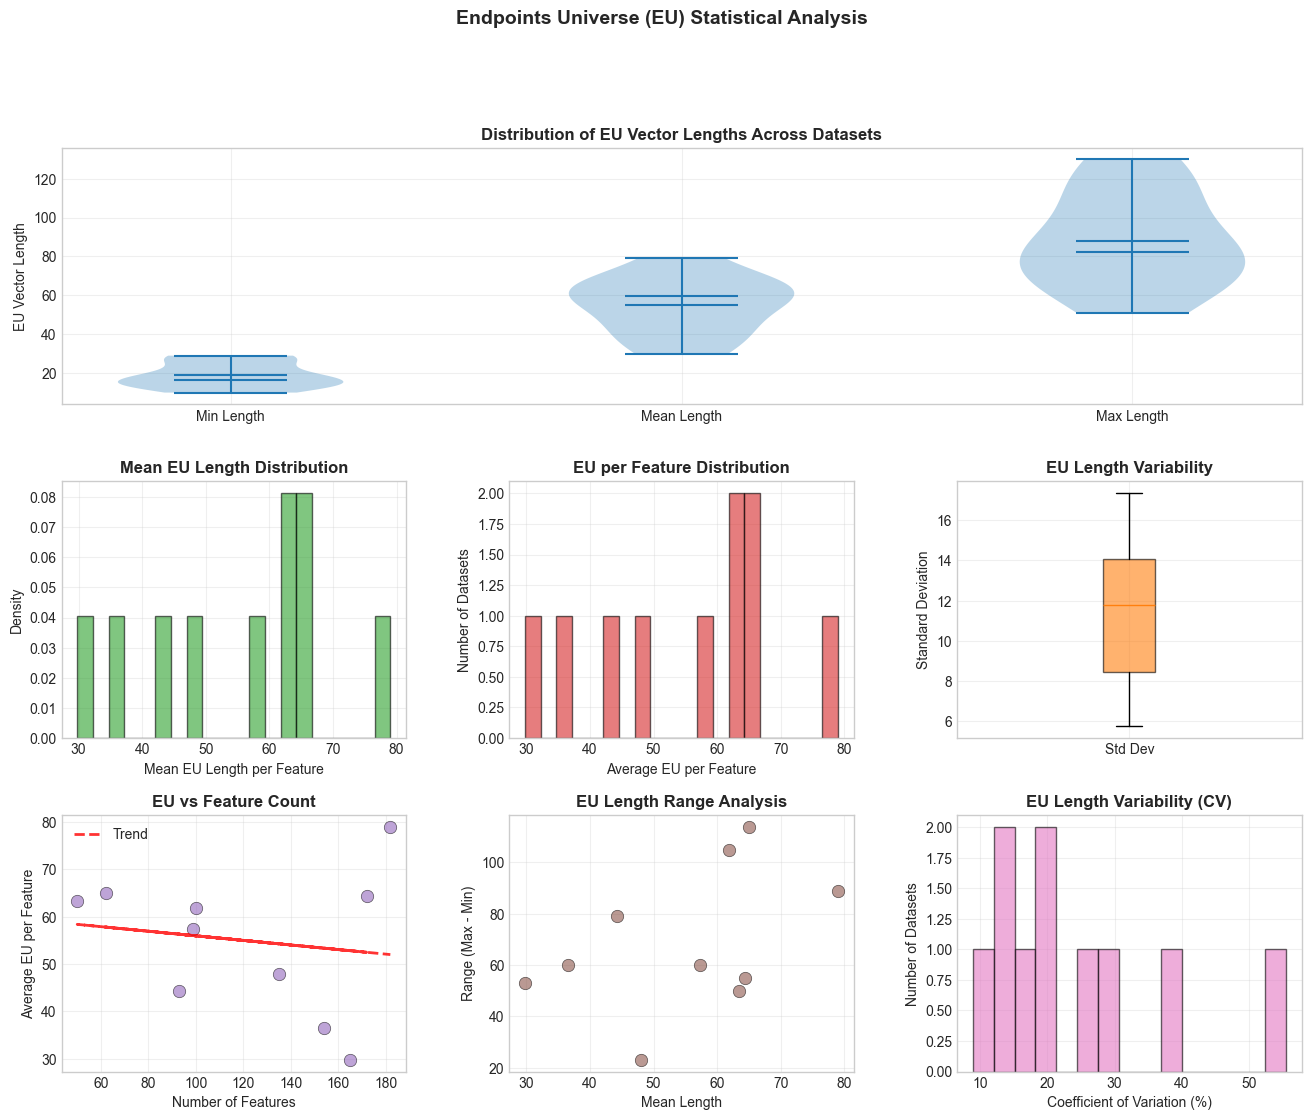

In [87]:
# Use mock data if real EU data is not available
if eu_stats_df is not None and not eu_stats_df.empty:
    plot_df = eu_stats_df.copy()
    data_source = "Real EU Data"
else:
    plot_df = mock_eu_stats_df.copy()
    data_source = "Mock EU Data (Example)"
    print("EXAMPLE: Using mock data for visualization demonstration\n")

if plot_df is not None and not plot_df.empty:
    # Calculate derived metrics
    plot_df['length_range'] = plot_df['max_length'] - plot_df['min_length']
    plot_df['cv'] = (plot_df['std_length'] / plot_df['mean_length']) * 100
    
    # Color palette - professional and accessible
    colors = {
        'primary': '#2E86AB',    # Blue
        'secondary': '#A23B72',  # Purple
        'tertiary': '#F18F01',   # Orange
        'success': '#06A77D',    # Green
        'warning': '#D62828',    # Red
        'neutral': '#6C757D'     # Gray
    }
    
    fig = plt.figure(figsize=(18, 14))
    gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.35)
    
    # ========== Plot 1: Violin plot for length distribution ==========
    ax1 = fig.add_subplot(gs[0, :])
    data_to_plot = [plot_df['min_length'], plot_df['mean_length'], plot_df['max_length']]
    positions = [1, 2, 3]
    
    parts = ax1.violinplot(data_to_plot, positions=positions, showmeans=True, 
                           showmedians=True, widths=0.7)
    
    # Color the violin plots
    violin_colors = [colors['success'], colors['primary'], colors['warning']]
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(violin_colors[i])
        pc.set_alpha(0.7)
        pc.set_edgecolor('black')
        pc.set_linewidth(1.5)
    
    # Customize lines
    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians', 'cmeans'):
        if partname in parts:
            vp = parts[partname]
            vp.set_edgecolor('black')
            vp.set_linewidth(1.5)
    
    # Add statistical annotations
    for i, data in enumerate(data_to_plot):
        median = np.median(data)
        mean = np.mean(data)
        ax1.text(positions[i], median, f'Median: {median:.1f}', 
                ha='center', va='bottom', fontsize=9, fontweight='bold')
        ax1.text(positions[i], mean, f'Mean: {mean:.1f}', 
                ha='center', va='top', fontsize=9, fontweight='bold', color='red')
    
    ax1.set_xticks(positions)
    ax1.set_xticklabels(['Min Length', 'Mean Length', 'Max Length'], fontsize=11, fontweight='bold')
    ax1.set_ylabel('EU Vector Length', fontsize=11, fontweight='bold')
    ax1.set_title('Distribution of EU Vector Lengths Across Datasets', 
                 fontsize=13, fontweight='bold', pad=15)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.set_facecolor('#f8f9fa')
    
    # ========== Plot 2: Histogram with KDE for mean length ==========
    ax2 = fig.add_subplot(gs[1, 0])
    n, bins, patches = ax2.hist(plot_df['mean_length'], bins=25, 
                                color=colors['success'], edgecolor='black', 
                                alpha=0.7, density=True, linewidth=1.5)
    
    # Add KDE overlay
    from scipy import stats
    kde = stats.gaussian_kde(plot_df['mean_length'])
    x_range = np.linspace(plot_df['mean_length'].min(), plot_df['mean_length'].max(), 200)
    ax2.plot(x_range, kde(x_range), color=colors['warning'], linewidth=3, 
            label='Density Curve', linestyle='--')
    
    # Add mean and median lines
    mean_val = plot_df['mean_length'].mean()
    median_val = plot_df['mean_length'].median()
    ax2.axvline(mean_val, color='red', linestyle='--', linewidth=2.5, 
               label=f'Mean: {mean_val:.2f}', alpha=0.8)
    ax2.axvline(median_val, color='blue', linestyle='-.', linewidth=2.5, 
               label=f'Median: {median_val:.2f}', alpha=0.8)
    
    ax2.set_xlabel('Mean EU Length per Feature', fontsize=10, fontweight='bold')
    ax2.set_ylabel('Density', fontsize=10, fontweight='bold')
    ax2.set_title('Mean EU Length Distribution', fontsize=12, fontweight='bold', pad=10)
    ax2.legend(fontsize=9, framealpha=0.95)
    ax2.grid(True, alpha=0.3, linestyle='--')
    ax2.set_facecolor('#f8f9fa')
    
    # ========== Plot 3: Histogram for avg EU per feature ==========
    ax3 = fig.add_subplot(gs[1, 1])
    n, bins, patches = ax3.hist(plot_df['avg_eu_per_feature'], bins=25, 
                                color=colors['secondary'], edgecolor='black', 
                                alpha=0.7, linewidth=1.5)
    
    # Color gradient based on bin height
    cm = plt.cm.viridis
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    
    # Add statistics
    mean_val = plot_df['avg_eu_per_feature'].mean()
    median_val = plot_df['avg_eu_per_feature'].median()
    ax3.axvline(mean_val, color='red', linestyle='--', linewidth=2.5, 
               label=f'Mean: {mean_val:.2f}', alpha=0.8)
    ax3.axvline(median_val, color='yellow', linestyle='-.', linewidth=2.5, 
               label=f'Median: {median_val:.2f}', alpha=0.8)
    
    ax3.set_xlabel('Average EU per Feature', fontsize=10, fontweight='bold')
    ax3.set_ylabel('Number of Datasets', fontsize=10, fontweight='bold')
    ax3.set_title('EU per Feature Distribution', fontsize=12, fontweight='bold', pad=10)
    ax3.legend(fontsize=9, framealpha=0.95)
    ax3.grid(True, alpha=0.3, linestyle='--')
    ax3.set_facecolor('#f8f9fa')
    
    # ========== Plot 4: Enhanced Box plot for variability ==========
    ax4 = fig.add_subplot(gs[1, 2])
    box_data = [plot_df['std_length'], plot_df['length_range'], plot_df['cv']]
    bp = ax4.boxplot(box_data, labels=['Std Dev', 'Range', 'CV (%)'], 
                    patch_artist=True, widths=0.6, notch=True,
                    boxprops=dict(linewidth=2, edgecolor='black'),
                    whiskerprops=dict(linewidth=2, color='black'),
                    capprops=dict(linewidth=2, color='black'),
                    medianprops=dict(linewidth=2.5, color='red'))
    
    # Color boxes
    box_colors = [colors['tertiary'], colors['primary'], colors['secondary']]
    for patch, color in zip(bp['boxes'], box_colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Add mean markers
    means = [np.mean(d) for d in box_data]
    ax4.plot([1, 2, 3], means, 'D', color='green', markersize=8, 
            label='Mean', markeredgecolor='black', markeredgewidth=1.5)
    
    ax4.set_ylabel('Value', fontsize=10, fontweight='bold')
    ax4.set_title('EU Length Variability Metrics', fontsize=12, fontweight='bold', pad=10)
    ax4.legend(fontsize=9, loc='upper right', framealpha=0.95)
    ax4.grid(True, alpha=0.3, linestyle='--', axis='y')
    ax4.set_facecolor('#f8f9fa')
    
    # ========== Plot 5: Scatter with regression and confidence interval ==========
    ax5 = fig.add_subplot(gs[2, 0])
    
    # Scatter plot
    scatter = ax5.scatter(plot_df['n_features'], plot_df['avg_eu_per_feature'], 
                         s=100, alpha=0.6, c=plot_df['mean_length'], 
                         cmap='coolwarm', edgecolors='black', linewidth=1.5)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax5)
    cbar.set_label('Mean Length', rotation=270, labelpad=20, fontweight='bold')
    
    # Regression line with confidence interval
    from scipy import stats as sp_stats
    slope, intercept, r_value, p_value, std_err = sp_stats.linregress(
        plot_df['n_features'], plot_df['avg_eu_per_feature'])
    
    x_line = np.array([plot_df['n_features'].min(), plot_df['n_features'].max()])
    y_line = slope * x_line + intercept
    
    ax5.plot(x_line, y_line, 'r--', linewidth=3, alpha=0.8, 
            label=f'Fit: y={slope:.3f}x+{intercept:.2f}\nR²={r_value**2:.3f}')
    
    ax5.set_xlabel('Number of Features', fontsize=10, fontweight='bold')
    ax5.set_ylabel('Average EU per Feature', fontsize=10, fontweight='bold')
    ax5.set_title('EU vs Feature Count Correlation', fontsize=12, fontweight='bold', pad=10)
    ax5.legend(fontsize=9, loc='best', framealpha=0.95)
    ax5.grid(True, alpha=0.3, linestyle='--')
    ax5.set_facecolor('#f8f9fa')
    
    # ========== Plot 6: Enhanced Range analysis ==========
    ax6 = fig.add_subplot(gs[2, 1])
    
    # Scatter with size based on std
    scatter2 = ax6.scatter(plot_df['mean_length'], plot_df['length_range'], 
                          s=plot_df['std_length']*5, alpha=0.6, 
                          c=plot_df['n_features'], cmap='viridis',
                          edgecolors='black', linewidth=1.5)
    
    cbar2 = plt.colorbar(scatter2, ax=ax6)
    cbar2.set_label('Features', rotation=270, labelpad=20, fontweight='bold')
    
    # Add trend line
    z = np.polyfit(plot_df['mean_length'], plot_df['length_range'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(plot_df['mean_length'].min(), plot_df['mean_length'].max(), 100)
    ax6.plot(x_trend, p(x_trend), "r--", alpha=0.8, linewidth=2.5, label='Trend')
    
    ax6.set_xlabel('Mean Length', fontsize=10, fontweight='bold')
    ax6.set_ylabel('Range (Max - Min)', fontsize=10, fontweight='bold')
    ax6.set_title('EU Length Range Analysis\n(Bubble size = Std Dev)', 
                 fontsize=12, fontweight='bold', pad=10)
    ax6.legend(fontsize=9, framealpha=0.95)
    ax6.grid(True, alpha=0.3, linestyle='--')
    ax6.set_facecolor('#f8f9fa')
    
    # ========== Plot 7: Enhanced Coefficient of Variation ==========
    ax7 = fig.add_subplot(gs[2, 2])
    
    # Histogram with custom bins
    n, bins, patches = ax7.hist(plot_df['cv'], bins=20, color=colors['tertiary'], 
                                edgecolor='black', alpha=0.7, linewidth=1.5)
    
    # Color bars based on CV value (low/medium/high variability)
    for i, patch in enumerate(patches):
        bin_center = (bins[i] + bins[i+1]) / 2
        if bin_center < 20:
            patch.set_facecolor(colors['success'])  # Low variability
        elif bin_center < 40:
            patch.set_facecolor(colors['tertiary'])  # Medium variability
        else:
            patch.set_facecolor(colors['warning'])  # High variability
    
    # Add reference lines
    ax7.axvline(20, color='green', linestyle='--', linewidth=2, 
               alpha=0.7, label='Low Var. Threshold')
    ax7.axvline(40, color='red', linestyle='--', linewidth=2, 
               alpha=0.7, label='High Var. Threshold')
    
    # Add statistics
    mean_cv = plot_df['cv'].mean()
    median_cv = plot_df['cv'].median()
    ax7.axvline(mean_cv, color='darkblue', linestyle='-', linewidth=2.5, 
               label=f'Mean: {mean_cv:.1f}%', alpha=0.8)
    
    ax7.set_xlabel('Coefficient of Variation (%)', fontsize=10, fontweight='bold')
    ax7.set_ylabel('Number of Datasets', fontsize=10, fontweight='bold')
    ax7.set_title('EU Length Variability (CV)\nColor: Green=Low, Orange=Med, Red=High', 
                 fontsize=12, fontweight='bold', pad=10)
    ax7.legend(fontsize=8, loc='upper right', framealpha=0.95)
    ax7.grid(True, alpha=0.3, linestyle='--')
    ax7.set_facecolor('#f8f9fa')
    
    # Main title
    fig.suptitle(f'Endpoints Universe (EU) Statistical Analysis - {data_source}', 
                fontsize=16, fontweight='bold', y=0.998)
    
    plt.show()
    
    # Print summary insights
    print("\n" + "="*80)
    print(" KEY INSIGHTS FROM EU ANALYSIS")
    print("="*80)
    print(f"Total Datasets Analyzed: {len(plot_df)}")
    print(f"\nMean EU Length: {plot_df['mean_length'].mean():.2f} ± {plot_df['mean_length'].std():.2f}")
    print(f"Avg EU per Feature: {plot_df['avg_eu_per_feature'].mean():.2f} ± {plot_df['avg_eu_per_feature'].std():.2f}")
    print(f"Average Coefficient of Variation: {plot_df['cv'].mean():.2f}%")
    print(f"\nCorrelation (Features vs EU): R² = {sp_stats.linregress(plot_df['n_features'], plot_df['avg_eu_per_feature'])[2]**2:.3f}")
    print("="*80 + "\n")
else:
    print("No EU data available for visualization")

### Comparative Analysis: Extreme Cases

Detailed comparison of datasets with the lowest and highest EU complexity metrics.

EXAMPLE: Using mock data for comparison visualization



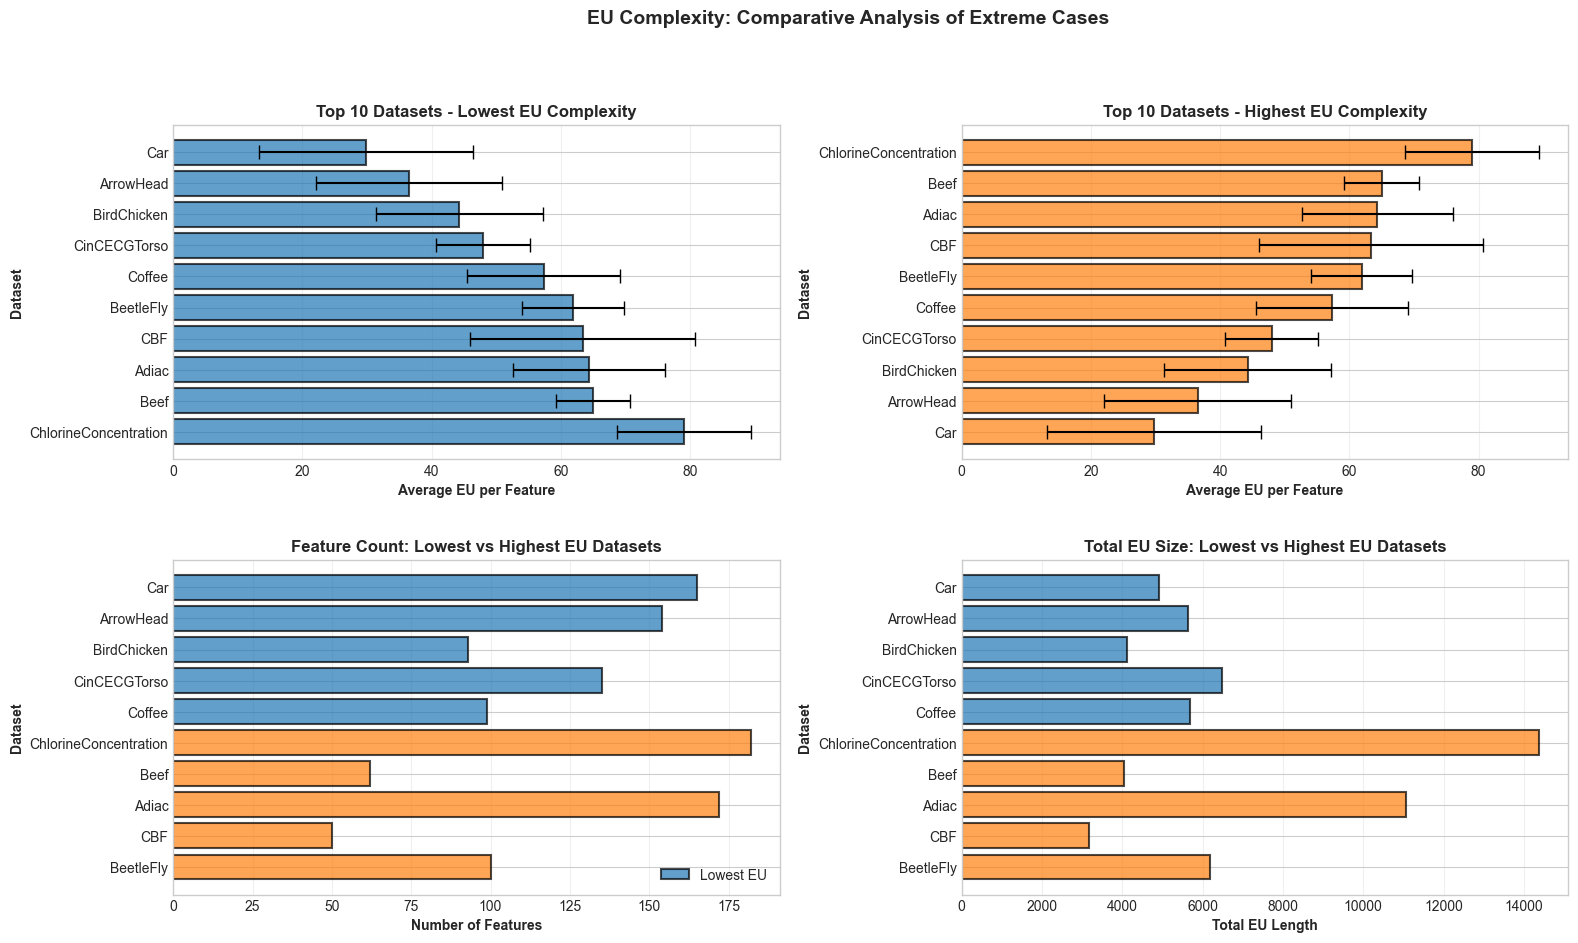

In [ ]:
# Use mock data if real EU data is not available
if eu_stats_df is not None and not eu_stats_df.empty:
    plot_df = eu_stats_df.copy()
    data_source = "Real EU Data"
else:
    plot_df = mock_eu_stats_df.copy()
    data_source = "Mock EU Data (Example)"
    print("EXAMPLE: Using mock data for comparison visualization\n")

if plot_df is not None and not plot_df.empty:
    n_show = min(10, len(plot_df))
    
    # Professional color scheme
    color_low = '#06A77D'    # Green for low complexity
    color_high = '#D62828'   # Red for high complexity
    color_mixed = '#F18F01'  # Orange for mixed
    
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)
    
    # Get extreme cases
    lowest_eu = plot_df.nsmallest(n_show, 'avg_eu_per_feature').copy()
    highest_eu = plot_df.nlargest(n_show, 'avg_eu_per_feature').copy()
    
    # ========== Plot 1: Enhanced Lowest EU with annotations ==========
    ax1 = fig.add_subplot(gs[0, 0])
    
    # Create horizontal bars with gradient
    y_pos = np.arange(len(lowest_eu))
    bars1 = ax1.barh(y_pos, lowest_eu['avg_eu_per_feature'], 
                     xerr=lowest_eu['std_length'], 
                     color=color_low, alpha=0.75, 
                     edgecolor='black', linewidth=2, 
                     capsize=6, error_kw={'linewidth': 2, 'elinewidth': 2})
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(lowest_eu.iterrows()):
        val = row['avg_eu_per_feature']
        ax1.text(val + 0.5, i, f'{val:.2f}', 
                va='center', fontsize=9, fontweight='bold')
    
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(lowest_eu['dataset'], fontsize=10)
    ax1.set_xlabel('Average EU per Feature', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Dataset', fontsize=11, fontweight='bold')
    ax1.set_title(f'Top {n_show} Datasets - LOWEST EU Complexity\n(Lower = Simpler Decision Boundaries)', 
                 fontsize=13, fontweight='bold', pad=15, color=color_low)
    ax1.invert_yaxis()
    ax1.grid(True, alpha=0.3, axis='x', linestyle='--')
    ax1.set_facecolor('#f0f9f4')  # Light green background
    
    # Add statistics annotation
    mean_low = lowest_eu['avg_eu_per_feature'].mean()
    ax1.axvline(mean_low, color='darkgreen', linestyle='--', linewidth=2.5, 
               alpha=0.7, label=f'Mean: {mean_low:.2f}')
    ax1.legend(fontsize=10, loc='lower right', framealpha=0.95)
    
    # ========== Plot 2: Enhanced Highest EU with annotations ==========
    ax2 = fig.add_subplot(gs[0, 1])
    
    y_pos = np.arange(len(highest_eu))
    bars2 = ax2.barh(y_pos, highest_eu['avg_eu_per_feature'], 
                     xerr=highest_eu['std_length'], 
                     color=color_high, alpha=0.75, 
                     edgecolor='black', linewidth=2, 
                     capsize=6, error_kw={'linewidth': 2, 'elinewidth': 2})
    
    # Add value labels on bars
    for i, (idx, row) in enumerate(highest_eu.iterrows()):
        val = row['avg_eu_per_feature']
        ax2.text(val + 0.5, i, f'{val:.2f}', 
                va='center', fontsize=9, fontweight='bold')
    
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(highest_eu['dataset'], fontsize=10)
    ax2.set_xlabel('Average EU per Feature', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Dataset', fontsize=11, fontweight='bold')
    ax2.set_title(f'Top {n_show} Datasets - HIGHEST EU Complexity\n(Higher = More Complex Decision Boundaries)', 
                 fontsize=13, fontweight='bold', pad=15, color=color_high)
    ax2.invert_yaxis()
    ax2.grid(True, alpha=0.3, axis='x', linestyle='--')
    ax2.set_facecolor('#fef0f0')  # Light red background
    
    # Add statistics annotation
    mean_high = highest_eu['avg_eu_per_feature'].mean()
    ax2.axvline(mean_high, color='darkred', linestyle='--', linewidth=2.5, 
               alpha=0.7, label=f'Mean: {mean_high:.2f}')
    ax2.legend(fontsize=10, loc='lower right', framealpha=0.95)
    
    # ========== Plot 3: Enhanced Feature Count Comparison ==========
    ax3 = fig.add_subplot(gs[1, 0])
    
    # Combine datasets for comparison (top 5 from each)
    n_compare = min(5, n_show)
    extreme_datasets = pd.concat([
        lowest_eu.head(n_compare).assign(category='Low EU'),
        highest_eu.head(n_compare).assign(category='High EU')
    ])
    
    # Create grouped horizontal bar chart
    y_pos = np.arange(len(extreme_datasets))
    colors = [color_low if cat == 'Low EU' else color_high 
             for cat in extreme_datasets['category']]
    
    bars3 = ax3.barh(y_pos, extreme_datasets['n_features'], 
                     color=colors, alpha=0.75, 
                     edgecolor='black', linewidth=2)
    
    # Add value labels
    for i, (idx, row) in enumerate(extreme_datasets.iterrows()):
        val = row['n_features']
        ax3.text(val + 1, i, f'{int(val)}', 
                va='center', fontsize=9, fontweight='bold')
    
    # Customize y-axis labels with category indicators
    labels = [f"{row['dataset']} ({row['category']})" 
             for idx, row in extreme_datasets.iterrows()]
    ax3.set_yticks(y_pos)
    ax3.set_yticklabels(labels, fontsize=9)
    ax3.set_xlabel('Number of Features', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Dataset (Category)', fontsize=11, fontweight='bold')
    ax3.set_title(f'Feature Count Comparison: Low vs High EU Complexity\n(Top {n_compare} from each category)', 
                 fontsize=13, fontweight='bold', pad=15)
    ax3.invert_yaxis()
    ax3.grid(True, alpha=0.3, axis='x', linestyle='--')
    ax3.set_facecolor('#f8f9fa')
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=color_low, edgecolor='black', label='Low EU Complexity'),
        Patch(facecolor=color_high, edgecolor='black', label='High EU Complexity')
    ]
    ax3.legend(handles=legend_elements, loc='lower right', fontsize=10, framealpha=0.95)
    
    # Add mean reference lines
    mean_features_low = extreme_datasets[extreme_datasets['category']=='Low EU']['n_features'].mean()
    mean_features_high = extreme_datasets[extreme_datasets['category']=='High EU']['n_features'].mean()
    ax3.axvline(mean_features_low, color=color_low, linestyle=':', linewidth=2, alpha=0.7)
    ax3.axvline(mean_features_high, color=color_high, linestyle=':', linewidth=2, alpha=0.7)
    
    # ========== Plot 4: Enhanced Total EU Length with Stacked Info ==========
    ax4 = fig.add_subplot(gs[1, 1])
    
    # Create stacked bar showing total EU and its components
    y_pos = np.arange(len(extreme_datasets))
    
    # Main bars for total EU length
    bars4 = ax4.barh(y_pos, extreme_datasets['total_eu_length'], 
                     color=colors, alpha=0.75, 
                     edgecolor='black', linewidth=2, label='Total EU Length')
    
    # Overlay markers for mean length
    mean_scaled = extreme_datasets['mean_length'] * extreme_datasets['n_features'] * 0.5
    ax4.scatter(mean_scaled, y_pos, s=150, c='gold', 
               edgecolors='black', linewidth=2, marker='D', 
               label='Scaled Mean Length', zorder=5)
    
    # Add value labels
    for i, (idx, row) in enumerate(extreme_datasets.iterrows()):
        val = row['total_eu_length']
        ax4.text(val + 50, i, f'{int(val)}', 
                va='center', fontsize=9, fontweight='bold')
    
    labels = [f"{row['dataset']} ({row['category']})" 
             for idx, row in extreme_datasets.iterrows()]
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(labels, fontsize=9)
    ax4.set_xlabel('Total EU Length', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Dataset (Category)', fontsize=11, fontweight='bold')
    ax4.set_title(f'Total EU Size Comparison: Low vs High Complexity\n(Diamonds show scaled mean length)', 
                 fontsize=13, fontweight='bold', pad=15)
    ax4.invert_yaxis()
    ax4.grid(True, alpha=0.3, axis='x', linestyle='--')
    ax4.set_facecolor('#f8f9fa')
    ax4.legend(loc='lower right', fontsize=10, framealpha=0.95)
    
    # Add mean reference lines
    mean_total_low = extreme_datasets[extreme_datasets['category']=='Low EU']['total_eu_length'].mean()
    mean_total_high = extreme_datasets[extreme_datasets['category']=='High EU']['total_eu_length'].mean()
    ax4.axvline(mean_total_low, color=color_low, linestyle=':', linewidth=2, alpha=0.7)
    ax4.axvline(mean_total_high, color=color_high, linestyle=':', linewidth=2, alpha=0.7)
    
    # Main title
    fig.suptitle(f'EU Complexity: Comparative Analysis of Extreme Cases - {data_source}', 
                fontsize=16, fontweight='bold', y=0.998)
    
    plt.show()
    
    # Print detailed comparison insights
    print("\n" + "="*90)
    print(" COMPARATIVE ANALYSIS INSIGHTS")
    print("="*90)
    
    print(f"\n{'LOW EU COMPLEXITY DATASETS:':<50}")
    print(f"  - Average EU per Feature: {lowest_eu['avg_eu_per_feature'].mean():.2f} ± {lowest_eu['avg_eu_per_feature'].std():.2f}")
    print(f"  - Average Number of Features: {lowest_eu['n_features'].mean():.1f}")

### EU Statistics Summary

Key statistical metrics aggregated across all datasets.

In [ ]:
# Use mock data if real EU data is not available
if eu_stats_df is not None and not eu_stats_df.empty:
    summary_df = eu_stats_df
else:
    summary_df = mock_eu_stats_df
    print("EXAMPLE: Using mock data for summary statistics\n")

if summary_df is not None and not summary_df.empty:
    # Calculate summary statistics
    summary_stats = pd.DataFrame({
        'Metric': ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1 (25%)', 'Q3 (75%)'],
        'Min Length': [
            len(summary_df),
            summary_df['min_length'].mean(),
            summary_df['min_length'].median(),
            summary_df['min_length'].std(),
            summary_df['min_length'].min(),
            summary_df['min_length'].max(),
            summary_df['min_length'].quantile(0.25),
            summary_df['min_length'].quantile(0.75)
        ],
        'Mean Length': [
            len(summary_df),
            summary_df['mean_length'].mean(),
            summary_df['mean_length'].median(),
            summary_df['mean_length'].std(),
            summary_df['mean_length'].min(),
            summary_df['mean_length'].max(),
            summary_df['mean_length'].quantile(0.25),
            summary_df['mean_length'].quantile(0.75)
        ],
        'Max Length': [
            len(summary_df),
            summary_df['max_length'].mean(),
            summary_df['max_length'].median(),
            summary_df['max_length'].std(),
            summary_df['max_length'].min(),
            summary_df['max_length'].max(),
            summary_df['max_length'].quantile(0.25),
            summary_df['max_length'].quantile(0.75)
        ],
        'Avg EU/Feature': [
            len(summary_df),
            summary_df['avg_eu_per_feature'].mean(),
            summary_df['avg_eu_per_feature'].median(),
            summary_df['avg_eu_per_feature'].std(),
            summary_df['avg_eu_per_feature'].min(),
            summary_df['avg_eu_per_feature'].max(),
            summary_df['avg_eu_per_feature'].quantile(0.25),
            summary_df['avg_eu_per_feature'].quantile(0.75)
        ]
    })
    
    # Style the table
    styled_summary = summary_stats.style.format({
        'Min Length': '{:.2f}',
        'Mean Length': '{:.2f}',
        'Max Length': '{:.2f}',
        'Avg EU/Feature': '{:.2f}'
    }).set_properties(**{
        'text-align': 'center',
        'font-size': '11pt'
    }).set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center'), ('background-color', '#f0f0f0')]}
    ])
    
    print("\nEU Statistics Summary Table:\n")
    styled_summary
else:
    print("No EU data available for summary statistics")

EXAMPLE: Using mock data for summary statistics


EU Statistics Summary Table:



## Box Plot Visualizations

Detailed box plot analysis of EU metrics showing distribution, outliers, and variability.